In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
amazon = pd.read_csv("amazonreviews.tsv", sep="\t")
amazon

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [20]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [22]:
amazon.describe()

,label,review
count,10000,10000
unique,2,10000
top,neg,Stuning even for the non-gamer: This sound tra...
freq,5097,1


In [24]:
amazon.isnull().sum()

label     0
review    0
dtype: int64

In [26]:
import nltk
from nltk.corpus import stopwords

In [27]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words("english"))

In [29]:
### Data Cleaning

In [30]:
amazon.drop_duplicates(inplace = True)
amazon.dropna(subset = ["review"],inplace = True)
amazon.shape

(10000, 2)

In [31]:
### Text Preprocessing

In [32]:
import re

In [33]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]','', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

amazon['clean_review'] = amazon['review'].apply(clean_text)


In [34]:
### Encode Target Variable 

In [35]:
amazon['label'] = amazon['label'].map({"pos":1,"neg":0})
print(amazon['label'].value_counts())

label
0    5097
1    4903
Name: count, dtype: int64


In [36]:
### Exploratory Data Analysis

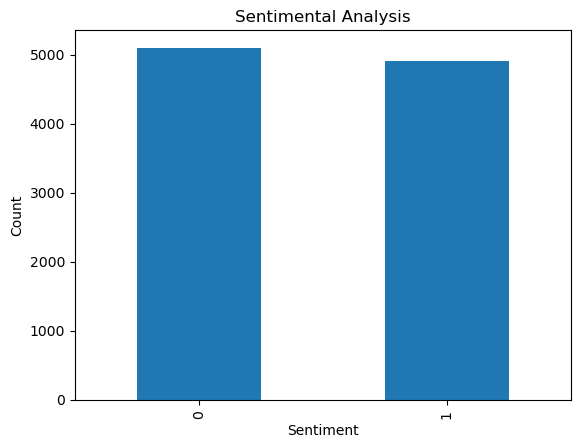

In [37]:
amazon['label'].value_counts().plot(kind="bar", title = "Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [38]:
# WORD CLOUD

In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud

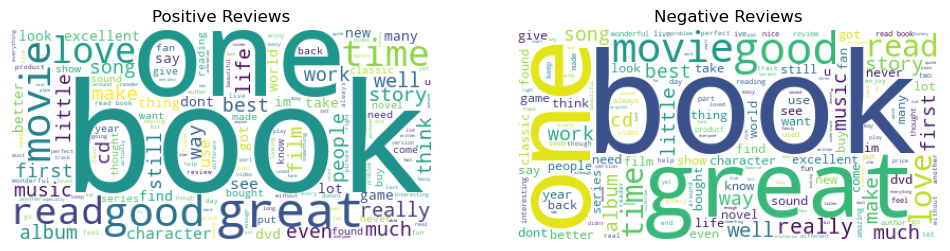

In [42]:
pos_text = ' '.join(amazon[amazon['label']==1]['clean_review'])
neg_text = ' '.join(amazon[amazon['label']==1]['clean_review'])

plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("Positive Reviews")
plt.imshow(WordCloud(background_color = 'white').generate(pos_text))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Negative Reviews")
plt.imshow(WordCloud(background_color = 'white').generate(neg_text))
plt.axis('off')

plt.show()

In [43]:
                                       # TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    amazon['review'],
    amazon['label'],
    test_size = 0.2,
    random_state = 42,
    stratify = amazon['label']
)

In [56]:
# TF_IDF FEATURE EXTRACTION

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer(
    max_features = 5000,
    ngram_range=(1,2)
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [74]:
                                      # LOGISTC REGRESSION MODEL

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [79]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

lr_preds = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1019
           1       0.85      0.86      0.86       981

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
                         # CROSS VALIDATION WITH LOGISTIC REGRESSION

In [81]:
X = amazon['review']
y = amazon['label']

In [83]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [87]:
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range = (1, 2))),
    ('model', LogisticRegression(max_iter = 1000))
])

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

lr_cs_scores = cross_val_score(
    lr_pipeline,
    X,
    y,
    cv = skf,
    scoring = 'f1'
)

print("Logistic Regeression CV F1 Scores:", lr_cs_scores)
print("Mean F1 Score:", lr_cs_scores.mean())

Logistic Regeression CV F1 Scores: [0.87309645 0.86073298 0.86330935 0.8680203  0.8765871 ]
Mean F1 Score: 0.8683492376262004
